# Phloem Flow Coupling

In [1]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint



# Simulate a root system
name = "CPlantBox_test_leaf_tree"
plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

for i in range (0,5):
    plant.simulate(i)
# for i in range(0,7):
#     plant.simulate(1) 



#seg = np.vstack((seg,lseg))
# print("number of root segments",len(rseg))
# print("number of shoot segments",len(sseg))
# print("number of segments",len(seg))

#rootnodes = v2a(sca('organtype'))

#print(rseg)
#print(sseg)
#print(lseg)
#print(sseg[1])

#print(len(nodes))
#print(len(rseg))
#print(len(lseg))



plant.write("results/Phloem.vtp",15)


 $J_{\mathrm{WX}}=-\Delta P_{\mathrm{X}}/\mathrm{r_{X}}$.Xylem flow between connected elements,  
Phloem flow between connected elements, $J_{\mathrm{WP}}=-\Delta P_{\mathrm{P}}/\mathrm{r_{P}}$.

Lateral water flow from xylem to phloem is driven by the difference in water potential. $
J_{Wlat}=(\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}
$  
Taking into account the non-zero partial molal volume of sucrose $\mathrm{\overline{V}}$ adds an extra lateral component to the liquid flow into the sieve tubes: $J_{Wlat}=\mathrm{\overline{V}}\times J_{Slat} (\psi_{\mathrm{X}}-\psi_{\mathrm{P}})/\mathrm{r_{lat}}$  
Hydrostatic pressure $P_{\mathrm{P}}$ within the sieve tubes is given by the difference between total phloem water potential and osmotic potential inside sieve tubes: $P_{\mathrm{P}}=\psi_{\mathrm{P}}-\Pi$

Xylem sap has a very low solute concentration which we shall ignore, so there is no osmotic component to its total water potential:
$P_{\mathrm{X}}=\psi_{\mathrm{X}}$
For a single phloem solute, Π is determined by its concentration C. For a dilute solution, Π is given by the Van’t Hoff relation:

$\Pi= -\mathrm{R} \times \mathrm{T} \times C$  

for dilute solutions, where R is the universal gas constant and T the absolute temperature. For a non-dilute solution, we use the empirical equation stated by Thompson and Holbrook (2003),

$\Pi= -ρ \times \mathrm{T} \times C$  
with $\mathrm{ρ_{w}}$ the density of water and m the molality given by  
$m = C/[\mathrm{ρ_{w}}(1-C \times \mathrm{\overline{V}})]$  

$\sum_{k} J_{W\_k}=0$

$J_{SP}= J_{WP} \times C$

$\frac{\mathrm{d}Q}{\mathrm{d}t}= -J_{Slat}-R_{\mathrm{M}}+\mathrm{Ph}-\frac{\mathrm{d}S}{\mathrm{d}t}$  

$R_{\mathrm{M}} = (\mathrm{K_4} + \mathrm{K_5} C) \times S_r$

where Sr is the structural carbon content of the element biomass, expressed in sucrose equivalents.

Starch metabolism is represented by a general equation derived from Daudet et al. (2002):

$\frac{\mathrm{d}S}{\mathrm{d}t}= \frac{\mathrm{V_{max}}\times C_{\mathrm{Par}}}{K_m+C_{\mathrm{Par}}}\times V_{\mathrm{Par}} - k_hyd \times S +k_6 \times(C_{\mathrm{Par}}-C_{\mathrm{targ}}) \times V_{\mathrm{Par}}$



In [3]:
C_targ = 0.1
r_lat = 23.5785
k_1 = 3.23994
k_2 = -3.23994
k_3 = 0
k_4 = 0
k_5 = 0
k_6 = 0
k_hyd = 0
k_M = 1.0
Ph = 0
R = 0.0083143
r_P = 14050.3
r_x = 0.0
T = 293
V_mean = 0.2155
v_max = 0
Rou_w = 0.99803



J_Wlat = (Phi_x - Phi_p)/r_lat
P_p = Phi_p - Pi_osmotic
Pi_osmotic = -R * T * C

SyntaxError: invalid syntax (<ipython-input-3-82ea8516fbf3>, line 8)

In [2]:
# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(15)) # root system segments
sseg = seg2a(plant.getSegments(4)) # strm system segments
lseg = v2ai(plant.getNodesOrganType())


plant_ana = pb.SegmentAnalyser(plant) 

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
node_connection = seg2a(plant.getSegments(15)) # plant segments
#sseg = seg2a(plant.getSegments(4)) #
node_organtype = v2ai(plant.getNodesOrganType())


nodes_with_organtype = np.column_stack([node_connection, node_organtype]) #make the node has organtype, to know the source sink relation

node_connection1, node_connection2 = np.split(node_connection.T,2)

node_connection1 = np.row_stack([node_connection1, node_organtype])
node_connection2 = np.row_stack([node_connection2, node_organtype])

nodes_organtype = np.column_stack([node_connection1,node_connection2])
_, indices = np.unique(nodes_organtype.T[:,0], return_index=True)
nodes_organtype = nodes_organtype.T[indices,:]



#print(nodes_organtype)
#print(node_connection2)
#print(nodes_with_organtype)   
print(node_connection)

unq, unq_idx, unq_cnt = np.unique(node_connection, return_inverse=True, return_counts=True)
#print(unq) 

#print(unq_cnt) 

#print(len(nodes))
#print(len(unq))
 
#print(len(unq_cnt))
#print(len(node_connection))

#type = v2a(plant.getScalar(15,"subtype"))
#otype = v2a(plant.getScalar(15,"organtype"))
#print(otype)
#print(len(otype))


nodes_organtype = np.column_stack((nodes_organtype,unq_cnt ))
nodes_organtype.astype(np.int_)

node_connection.astype(np.int_)
print(len(node_connection))
print(len(nodes_organtype))
print(nodes_organtype)
print(node_connection)



stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)|(nodes_organtype[:,1]== 4)][:,0]
index_stem= list(range(1, len(stem_nodes)+1))
for i in range(len(stem_nodes)):
    index_stem[i] = np.where( node_connection[:,1] == stem_nodes[i])

for i in range(len(index_stem)-1):
    node_connection[index_stem[i+1][0][0]]=node_connection[index_stem[i+1][0][0]][::-1]
node_connection
index_stem

[[  0   2]
 [  2   3]
 [  3   4]
 ...
 [875 876]
 [876 877]
 [877 878]]
881
883
[[  0   2   1]
 [  1   4   1]
 [  2   2   2]
 ...
 [880   4   2]
 [881   4   2]
 [882   4   1]]
[[  0   2]
 [  2   3]
 [  3   4]
 ...
 [875 876]
 [876 877]
 [877 878]]


[(array([], dtype=int64),),
 (array([444], dtype=int64),),
 (array([445], dtype=int64),),
 (array([446], dtype=int64),),
 (array([447], dtype=int64),),
 (array([448], dtype=int64),),
 (array([449], dtype=int64),),
 (array([450], dtype=int64),),
 (array([451], dtype=int64),),
 (array([452], dtype=int64),),
 (array([453], dtype=int64),),
 (array([454], dtype=int64),),
 (array([455], dtype=int64),),
 (array([456], dtype=int64),),
 (array([457], dtype=int64),),
 (array([458], dtype=int64),),
 (array([459], dtype=int64),),
 (array([460], dtype=int64),),
 (array([461], dtype=int64),),
 (array([462], dtype=int64),),
 (array([463], dtype=int64),),
 (array([464], dtype=int64),),
 (array([465], dtype=int64),),
 (array([466], dtype=int64),),
 (array([467], dtype=int64),),
 (array([468], dtype=int64),),
 (array([469], dtype=int64),),
 (array([470], dtype=int64),),
 (array([471], dtype=int64),),
 (array([472], dtype=int64),),
 (array([473], dtype=int64),),
 (array([474], dtype=int64),),
 (array([47

In [3]:
node_connection

array([[  0,   2],
       [  2,   3],
       [  3,   4],
       ...,
       [876, 875],
       [877, 876],
       [878, 877]], dtype=uint32)

[[  0   2   1]
 [  1   1   2]
 [  2   2   2]
 [  3   2   2]
 [  4   2   2]
 [  5   2   2]
 [  6   2   2]
 [  7   2   2]
 [  8   2   2]
 [  9   2   3]
 [ 10   2   2]
 [ 11   2   2]
 [ 12   2   3]
 [ 13   2   2]
 [ 14   2   2]
 [ 15   2   3]
 [ 16   2   2]
 [ 17   2   3]
 [ 18   2   2]
 [ 19   2   2]
 [ 20   2   3]
 [ 21   2   2]
 [ 22   4   2]
 [ 23   4   2]
 [ 24   4   2]
 [ 25   4   2]
 [ 26   4   2]
 [ 27   4   2]
 [ 28   4   2]
 [ 29   4   2]
 [ 30   4   2]
 [ 31   4   2]
 [ 32   4   2]
 [ 33   4   2]
 [ 34   4   2]
 [ 35   4   2]
 [ 36   4   2]
 [ 37   4   2]
 [ 38   4   2]
 [ 39   4   2]
 [ 40   4   2]
 [ 41   4   2]
 [ 42   2   2]
 [ 43   2   2]
 [ 44   2   2]
 [ 45   2   2]
 [ 46   2   3]
 [ 47   2   2]
 [ 48   2   2]
 [ 49   2   3]
 [ 50   2   2]
 [ 51   2   2]
 [ 52   2   3]
 [ 53   2   2]
 [ 54   2   2]
 [ 55   2   3]
 [ 56   2   2]
 [ 57   2   2]
 [ 58   2   3]
 [ 59   2   2]
 [ 60   2   3]
 [ 61   2   2]
 [ 62   2   2]
 [ 63   2   3]
 [ 64   2   2]
 [ 65   2   2]
 [ 66   2 

In [77]:
print(node_connection)
print( N2_c_nd_2[0][0][1])
print('   ')
print( N2_conn_2)

[[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 20]
 [20 21]
 [ 5 29]
 [29 30]
 [30 32]
 [32 33]
 [33 34]
 [34 37]
 [37 38]
 [38 39]
 [12  1]
 [13 12]
 [14 13]
 [15 14]
 [17 15]
 [18 17]
 [19 18]
 [23 19]
 [26 23]
 [27 26]
 [28 27]
 [31 28]
 [16 15]
 [22 16]
 [24 23]
 [25 24]
 [35 31]
 [36 35]]
1
   
[array([20], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([6], dtype=int64), array([7], dtype=int64), array([8], dtype=int64), array([9], dtype=int64), array([21], dtype=int64), array([22], dtype=int64), array([23], dtype=int64), array([33], dtype=int64), array([25], dtype=int64), array([26], dtype=int64), array([27], dtype=int64), array([10], dtype=int64), array([35], dtype=int64), array([29], dtype=int64), array([30], dtype=int64), array([31], dtype=int64), array([12], dtype=int64), array([13], dtype=int64), array([36], dtype=int64), array([14

In [64]:
print( N2_conn_2[4][1])
print( N2_node)

12
[[ 1  1  2]
 [ 2  2  2]
 [ 3  2  2]
 [ 4  2  2]
 [ 6  2  2]
 [ 7  2  2]
 [ 8  2  2]
 [ 9  2  2]
 [10  2  2]
 [11  2  2]
 [12  4  2]
 [13  4  2]
 [14  4  2]
 [16  8  2]
 [17  4  2]
 [18  4  2]
 [19  4  2]
 [20  2  2]
 [24  8  2]
 [26  4  2]
 [27  4  2]
 [28  4  2]
 [29  2  2]
 [30  2  2]
 [31  8  2]
 [32  2  2]
 [33  2  2]
 [34  2  2]
 [35  8  2]
 [37  2  2]
 [38  2  2]]


In [4]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1

N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]

N1L_c_nd = list(range(1, len(N1L_node)+1))
N1L_conn = list(range(1, len(N1L_node)+1))
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,0] == N1L_node[i][0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_c_nd[i][0,1])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = list(range(1, len(N1R_node)+1))
N1R_conn = list(range(1, len(N1R_node)+1))
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i][0])]
    N1R_conn[i] = np.where( node_connection[:,1] == N1R_c_nd[i][0,1])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

# #print(N2_node)
# N2_c_nd_1 = list(range(1, len(N2_node)+1))
# N2_conn_1 = list(range(1, len(N2_node)+1))
# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]
#     else:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

# #temp= N2_c_nd_1[0]
# #temp=temp[::-1] 
# #print(temp )
# N2_c_nd_2 = list(range(1, len(N2_node)+1))
# N2_conn_2 = list(range(1, len(N2_node)+1))

# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
#     else:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
# #N2_c_nd_2[0] = np.array([temp]) 
# #print(N2_c_nd_2)
# for i in range(len(N2_node)):
#     N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][0])[0]

# N2_conn_2[0]=[0-(np.where( node_connection[:,0] == 1))[0][1]-2]


################## Nodes With 2 Connections #########################
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]


#temp= N2_c_nd_1[0]
#temp=temp[::-1] 
#print(temp )

N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
    N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][1])[0]

    

################## Nodes With 3 Connections #########################
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1
# for i in range(len(N3_node)):
#     print(N3_c_nd_3[i][1,1])
#for i in range(len(N3_node)):
#    print(N3_conn_3[i][0]+1)
# N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
# #print(N3_node)

# N3_c_nd_1 = list(range(1, len(N3_node)+1))
# N3_conn_1 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
#     N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i][0,0])[0]

# #print(len(N3_c_nd_1))
# #print(len(N3_conn_1))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_1[i][0,0])
# #for i in range(len(N3_node)):
# #    print(N3_conn_1[i][0]+1)
    
    
# N3_c_nd_2 = list(range(1, len(N3_node)+1))
# N3_conn_2 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i][0,1])[0]

# #print(len(N3_c_nd_2))
# #print(len(N3_conn_2))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_2[i][0,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_2[i][0]+1)
    
# N3_c_nd_3 = list(range(1, len(N3_node)+1))
# N3_conn_3 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]

# #print(N3_c_nd_3)
# #print(len(N3_conn_3))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_3[i][1,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_3[i][0]+1)

N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]

# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

# print(N4_c_nd_2[0][0][0])
# print(N4_c_nd_2) 
# print(N4_conn_2) 
# print(N4_conn_3) 
# print(N4_conn_4) 










#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype))
Vmax = np.zeros(len(nodes_organtype))
C_targ = np.zeros(len(nodes_organtype))
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 1e-025)
r_ST = np.full(len(nodes_organtype), 1405.03)
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e+025)
r_Apo = np.full(len(nodes_organtype), 1e+025)
r_Sympl = np.full(len(nodes_organtype), 1e+025)




for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #different in source, sink or connection of piafmunch2
        kMU[i]        = 10e-100     #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2
        vMU[i]        = 2.82627e+95      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018        
    elif nodes_organtype[i,2]!=1:
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 1e-100
        Vmax[i]       = 0
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 8.83573e-05
        volParApo[i]  = 8.83573e-05
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018



#'******** INITIAL VALUES *********\n'
#initialization of the parameters
Q_ST = np.full(len(nodes_organtype), 0)
Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Starch = np.full(len(nodes_organtype), 1)
Q_PhlApo = np.full(len(nodes_organtype), 4.4e-006)
Q_ParApo = np.full(len(nodes_organtype), 4.4e-006)
Tr_Q_ST = np.full(len(nodes_organtype), 0)
Tr_Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Tr_Starch = np.full(len(nodes_organtype), 1)
Tr_Q_PhlApo = np.full(len(nodes_organtype), 0)
Tr_Q_ParApo = np.full(len(nodes_organtype), 0)
vol_Sympl = np.full(len(nodes_organtype), 8.83573e-005)

#******** SIMULATION SOLVING PARAMETERS *********


#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters

Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
vol_Sympl_Abs = np.full(len(nodes_organtype), 8.83573e-012)



for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        Q_ST_Abs[i] =  1e-015
        Q_Sympl_Abs[i] =  1e-015
        Starch_Abs[i] =  1e-012
        Q_PhlApo_Abs[i] =  1e-015
        Q_ParApo_Abs[i] =  1e-015
        Tr_Q_ST_Abs[i] =  1e-012
        Tr_Q_Sympl_Abs[i] =  1e-012
        Tr_Starch_Abs[i] =  1e-012
        Tr_Q_PhlApo_Abs[i] =  1e-015
        Tr_Q_ParApo_Abs[i] =  1e-015
        vol_Sympl_Abs[i] = 1e-012













f = open('PiafMunch2_python_test.ini','w')
f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
for i in range(len(N1L_node)):
    f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,1],(N1L_conn[i][0]+1)))





f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
for i in range(len(N1R_node)):
    f.write("{:d}  {:d}  {:d} {:e}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0]-1, 1e-025))

f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
for i in range(len(N2_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]-1))    
f.write('\n')

f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
for i in range(len(N3_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d}\n".format(N3_node[i][0],N3_c_nd_1[i],N3_conn_1[i],N3_c_nd_2[i],N3_conn_2[i],N3_c_nd_3[i],N3_conn_3[i]))    
f.write('\n')




f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', np.count_nonzero(unq_cnt == 4)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))

for i in range(len(N4_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d} {:d} {:d}\n".format(N4_node[i][0],N4_c_nd_1[i],N4_conn_1[i],N4_c_nd_2[i][0][0],0-N4_conn_2[i][0]-1,N4_c_nd_2[i][1][0],0-N4_conn_3[i][0]-1,N4_c_nd_2[i][2][0],0-N4_conn_4[i][0]-1))    
f.write('\n')



f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', np.count_nonzero(unq_cnt == 5)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', np.count_nonzero(unq_cnt == 6)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', np.count_nonzero(unq_cnt == 7)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', np.count_nonzero(unq_cnt == 8)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
f.write("{:s}  {:s}  {:s} \n".format('T\xb0 K','visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(node_connection)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
for i in range(len(node_connection)):
    f.write("{:d}  {:d}  {:d} {:e} {:e}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
f.write('\n')

f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
f.write('\n')


f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}\n"
    .format(nodes_organtype[i+1][0],kML[i+1], vML[i+1], kMU[i+1], vMU[i+1], kMParMb[i+1], vMParMb[i+1], kM[i+1], Vmax[i+1], C_targ[i+1], kHyd[i+1], 
    k1[i+1], k2[i+1], k3[i+1], StructC[i+1], vol_ST[i+1], volPhlApo[i+1], volParApo[i+1], k_Lockhart[i+1], P_thr[i+1], vol_Sympl_max[i+1]))
f.write('\n')



f.write('******** INITIAL VALUES  *********\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST[i+1],Q_Sympl[i+1],Starch[i+1],Q_PhlApo[i+1],Q_ParApo[i+1], 
                    Tr_Q_ST[i+1],Tr_Q_Sympl[i+1],Tr_Starch[i+1],Tr_Q_PhlApo[i+1],Tr_Q_ParApo[i+1],vol_Sympl[i+1]))
f.write('\n')    
    
f.write('******** SIMULATION SOLVING PARAMETERS *********\n')
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('StartTime','EndTime','OutputStep', 'TracerHalfLife','Rel_Tol'))
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('0', '9', '0.166667', '0.33967', '1e-007'))
f.write('\n')     

f.write('***Abs_Tols for individual  nodes ***')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST_Abs[i+1],Q_Sympl_Abs[i+1],Starch_Abs[i+1],Q_PhlApo_Abs[i+1],Q_ParApo_Abs[i+1], 
                    Tr_Q_ST_Abs[i+1],Tr_Q_Sympl_Abs[i+1],Tr_Starch_Abs[i+1],Tr_Q_PhlApo_Abs[i+1],Tr_Q_ParApo_Abs[i+1],vol_Sympl_Abs[i+1]))
f.write('\n')     
    
f.write('******** OUTPUT SETTINGS : INDIVIDUAL NODE - LATERAL FLUXES-RELATED VARIABLES *********\n')    
f.write('Nodes selected for plotting  : nsp = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
    
f.write('individual-Node-related variables selected for plotting : nvp = 3\n')    
f.write('C_ST (mmol / ml)\n')        
f.write('JS_PhlMb (mmol / h)\n')        
f.write('JW_Trsv (ml / h)\n')        

   
f.write('Nodes selected for saving  : nss = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
f.write('\n')    


f.write('individual-Node-related variables selected for saving : nvs = 5\n')    
f.write('C_ST (mmol / ml)\n')     
f.write('P_ST (MPa)\n')   
f.write('JS_PhlMb (mmol / h)\n')        
f.write('JW_Trsv (ml / h)\n')  
f.write('P_Xyl (MPa)\n') 

f.write('******** OUTPUT SETTINGS : INTERNODE CONNECTION - AXIAL FLUXES-RELATED VARIABLES *********\n')  
f.write('node-to-node Fluxes selected for plotting  : fsp = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for plotting : fvp = 2\n')    
f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')        
      
 
f.write('node-to-node Fluxes selected for saving  : fss = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for saving : fvs = 2\n')    
f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')  


print('out put successful')




f.close()

[[  9   2   3]
 [ 12   2   3]
 [ 15   2   3]
 [ 17   2   3]
 [ 20   2   3]
 [ 46   2   3]
 [ 49   2   3]
 [ 52   2   3]
 [ 55   2   3]
 [ 58   2   3]
 [ 60   2   3]
 [ 63   2   3]
 [ 66   2   3]
 [ 68   2   3]
 [ 71   2   3]
 [ 73   2   3]
 [ 75   2   3]
 [ 77   2   3]
 [ 79   2   3]
 [ 82   2   3]
 [ 84   2   3]
 [188   2   3]
 [192   2   3]
 [196   2   3]
 [199   2   3]
 [202   2   3]
 [206   2   3]
 [209   2   3]
 [211   2   3]
 [213   2   3]
 [215   2   3]
 [217   2   3]
 [219   2   3]
 [222   2   3]
 [224   2   3]
 [226   2   3]
 [228   2   3]
 [230   2   3]
 [233   2   3]
 [236   2   3]
 [239   2   3]
 [242   2   3]
 [465   2   3]
 [471   2   3]
 [476   2   3]
 [480   2   3]
 [484   2   3]
 [488   2   3]
 [492   2   3]
 [496   2   3]
 [500   2   3]
 [504   2   3]
 [508   2   3]
 [569   8   3]
 [578   8   3]
 [586   8   3]
 [594   8   3]
 [602   8   3]
 [610   8   3]
 [618   8   3]
 [626   8   3]
 [633   8   3]
 [640   8   3]
 [647   8   3]
 [654   8   3]
 [661   8   3]
 [667   8 

In [6]:
N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]
# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

print(N4_c_nd_2[i][0][0])
print(N4_c_nd_2) 
print(N4_conn_2[i][0]) 
print(N4_conn_3) 
print(N4_conn_4) 

[568, 730, 875]
[568, 582, 610]
884
[array([[718, 569],
       [570, 569],
       [684, 569]], dtype=uint32), array([[849, 731],
       [732, 731],
       [823, 731]], dtype=uint32), array([[884, 876],
       [877, 876],
       [880, 876]], dtype=uint32)]
610
[array([614], dtype=int64), array([762], dtype=int64), array([879], dtype=int64)]
[array([728], dtype=int64), array([853], dtype=int64), array([882], dtype=int64)]


In [159]:
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1

print(N3_c_nd_1)
print( N3_conn_1 )

print( N3_c_nd_2 )
print( N3_conn_2 )
print(N3_c_nd_3)
print( N3_conn_3 )



[[ 5  2  3]
 [15  4  3]
 [23  4  3]]
[4, 14, 19]
[-4, 24, 28]
[6, 17, 26]
[5, -25, -29]
[29, 16, 24]
[13, -33, -35]


In [150]:
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i])[0]
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0]

# print(N3_c_nd_1)
# #print(len(N3_conn_1))
# for i in range(len(N3_node)):
#     print(N3_c_nd_1[i][0,0])
# for i in range(len(N3_node)):
#     print(N3_conn_1[i][0]+1)
    
    
N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0,1]
        N3_conn_2[i] = np.where( node_connection[:,0] == N3_c_nd_2[i])[0]
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0,0]
        N3_conn_2[i] = np.where( node_connection[:,0] == N3_c_nd_2[i])[0]

#print(len(N3_c_nd_2))
# print(N3_c_nd_2)
# for i in range(len(N3_node)):
#     print(N3_c_nd_2[i][0,1])
for i in range(len(N3_node)):
    print(N3_conn_2[i][0]+1)
    
N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0]

print(N3_c_nd_1)
print( N3_conn_1 )
print(N3_c_nd_2)
print( N3_c_nd_2[1][0][1] )
print( N3_conn_2 )
print(N3_c_nd_3)
print( N3_conn_3 )


[[ 5  2  3]
 [15  4  3]
 [23  4  3]]
6
25
29
[4, 14, 19]
[6, 17, 26]


In [48]:

print(N4_node)

print(N4_c_nd_2) 
print(N4_c_nd_1)
print(N4_conn_1)
print(N4_conn_2)
print(N4_conn_3)
print(N4_conn_4)

[[635   4   4]
 [795   4   4]
 [941   4   4]]
[array([[784, 635],
       [636, 635],
       [750, 635]], dtype=uint32), array([[913, 795],
       [796, 795],
       [887, 795]], dtype=uint32), array([[949, 941],
       [942, 941],
       [945, 941]], dtype=uint32)]
[634, 794, 940]
[634, 646, 675]
[array([634], dtype=int64), array([646], dtype=int64), array([675], dtype=int64)]
[array([679], dtype=int64), array([827], dtype=int64), array([944], dtype=int64)]
[array([793], dtype=int64), array([918], dtype=int64), array([947], dtype=int64)]


In [26]:
# function that returns dy/dt
def ds_dt(y, t):


    G = 6.672*(10**-11)
    M = 5.972*(10**24)
    mu = G*M
    r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)

    dy0 = y[3]
    dy1 = y[4]
    dy2 = y[5]
    dy3 = -(mu / (r**3)) * y[0]
    dy4 = -(mu / (r**3)) * y[1]
    dy5 = -(mu / (r**3)) * y[2]
    return [dy0, dy1, dy2, dy3, dy4, dy5]

t = np.arange(0, 100000, 0.1)
y0 = [7.e6, 0., 0., 0., 1.e3, 0.]
y = odeint(dr_dt, y0, t)
plt.plot(y[:,0], y[:,1])
plt.show()



NameError: name 'dr_dt' is not defined

In [4]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint

name = "CPlantBox_test_leaf_tree"
plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

for i in range (0,5):
    plant.simulate(i)
# for i in range(0,7):
#     plant.simulate(1) 


In [5]:

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(2)) # root system segments
sseg = seg2a(plant.getSegments(4)) # root system segments
seg = np.vstack((sseg,rseg))
# Adjacency matrix
A = sparse.coo_matrix((np.ones(seg.shape[0]),(seg[:,0],seg[:,1]))) 

# Parameters for flux model
rs_Kr = np.array([ 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-10, 2.e-11, 2.e-11 ]) # s/m; root hydraulic radial conductivity per root type 
rs_Kz = np.array([ 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14, 5.e-14 ]) # m2*s; root hydraulic axial conductivity per root type 

soil_psi = -700 # static soil pressure J kg^-1

rho = 1e3 # kg / m^3      
g = 1.e-3*9.8065 # m / s^2   

pot_trans = np.array([-1.15741e-10]) # # m^3 s^-1 potential transpiration

# Conversions
plant_ana = pb.SegmentAnalyser(plant) 
radius = v2a(plant_ana.getScalar("radius"))/100. # convert from cm to m
type = v2a(plant_ana.getScalar("subtype"))
kr = np.array(list(map(lambda t: rs_Kr[int(t)-1], type))) # convert from 'per type' to 'per segment'
kr.resize((kr.shape[0],1))
kz = np.array(list(map(lambda t: rs_Kz[int(t)-1], type)))     
kz.resize((kz.shape[0],1))          

print(radius)
# glue together shoot and root segments
shoot1 = np.ones((sseg.shape[0],1))                    
shoot0 = np.ones((sseg.shape[0],1))
radius = np.vstack((shoot1,radius))
kr =  np.vstack((shoot0,kr))
kz =  np.vstack((shoot1,kz))  
            
# Call back function for soil potential
soil = lambda x,y,z : soil_psi

# Calculate fluxes within the root system
Q, b = xylem_flux.linear_system(seg, nodes, radius, kr, kz, rho, g, soil)
# plt.spy(Q)
# plt.show()
Q, b = xylem_flux.bc_neumann(Q, b, np.array([0]), np.array([pot_trans]))


start = timeit.default_timer()
x = LA.spsolve(Q, b, use_umfpack = True) # direct
stop = timeit.default_timer()
print ("linear system solved in", stop - start, " s") 
      
# Save results into vtp 
segP = nodes2seg(nodes,seg,x)# save vtp 
axial_flux = xylem_flux.axial_flux(x, seg, nodes, kz, rho, g)
radial_flux = xylem_flux.radial_flux(x, seg, nodes, radius, kr, soil)
net_flux = axial_flux+radial_flux

plant_ana.addUserData(a2v(segP[sseg.shape[0]:]),"pressure")
plant_ana.addUserData(a2v(axial_flux[sseg.shape[0]:]),"axial_flux")
plant_ana.addUserData(a2v(radial_flux[sseg.shape[0]:]),"radial_flux")
plant_ana.addUserData(a2v(net_flux[sseg.shape[0]:]),"net_flux")

plant_ana.write("results/Phloem.vtp")

[[1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.55051143e-03]
 [1.550511

In [8]:
print(len(segP[sseg.shape[0]:]))

881


In [9]:
print(sseg[:,1])
print(len(sseg[:,1]))
print(len(node_connection))

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84 187 188 190 191 192 194 195 196 198 199 201 202 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 465 469 470 471 475 476 479 480 483 484 487 488 491 492
 494 495 496 498 499 500 502 503 504 506 507 508 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533
 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551
 552  42 122 123 124 295 296  43 125 126 127 297 298  44 128 129 130 131
 299 300 301 302  45 132 133 134 303 304 135 136 137 138 305 306 139 140
 141 142 307 308 143 144 145 146 309 310 311 312 313 147 148 149 314 315
 316 150 151 152 153 317 318 319 320 154 155 156 15

In [6]:
import pandas as pd
path = 'PiafMunch2_python_test_output.txt'
#pd.read_table(path,sep='\t')


In [10]:
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*3+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]


JW_Trsv (ml / h)[ 1]     1.442560e-09
JW_Trsv (ml / h)[ 2]    -6.990990e-09
JW_Trsv (ml / h)[ 3]     3.228950e-09
JW_Trsv (ml / h)[ 4]     7.525490e-10
JW_Trsv (ml / h)[ 5]     7.618070e-10
JW_Trsv (ml / h)[ 6]    -2.041220e-09
JW_Trsv (ml / h)[ 7]    -1.604410e-09
JW_Trsv (ml / h)[ 8]     5.761430e-09
JW_Trsv (ml / h)[ 9]    -1.826490e-09
JW_Trsv (ml / h)[10]     1.131610e-09
JW_Trsv (ml / h)[11]    -5.992380e-10
JW_Trsv (ml / h)[12]    -1.023370e-10
JW_Trsv (ml / h)[13]     8.344870e-10
JW_Trsv (ml / h)[14]     2.653230e-09
JW_Trsv (ml / h)[15]    -1.012730e-08
JW_Trsv (ml / h)[16]     2.769260e-09
JW_Trsv (ml / h)[17]     2.026010e-11
JW_Trsv (ml / h)[18]    -1.005820e-09
JW_Trsv (ml / h)[19]     2.004050e-09
JW_Trsv (ml / h)[20]    -4.039650e-09
JW_Trsv (ml / h)[21]     1.831490e-09
JW_Trsv (ml / h)[22]     1.449730e-09
JW_Trsv (ml / h)[23]    -1.339200e-09
JW_Trsv (ml / h)[24]    -3.831320e-09
JW_Trsv (ml / h)[25]     1.038860e-08
JW_Trsv (ml / h)[26]    -4.326770e-09
JW_Trsv (ml 

In [12]:

plant_ana.clearUserData()
JS_ST_0_out=output.iloc[1, JS_ST_begin:JS_ST_end]
JS_ST_0_out_array = JS_ST_0_out.values
plant_ana.addUserData(a2v(JS_ST_0_out_array),"JS_ST_0")

JS_ST_1_out=output.iloc[7, JS_ST_begin:JS_ST_end]
JS_ST_1_out_array = JS_ST_1_out.values
plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_1")


JS_ST_5_out=output.iloc[30, JS_ST_begin:JS_ST_end]
JS_ST_5_out_array = JS_ST_5_out.values
plant_ana.addUserData(a2v(JS_ST_5_out_array),"JS_ST_5")

JS_ST_9_out=output.iloc[50, JS_ST_begin:JS_ST_end]
JS_ST_9_out_array = JS_ST_9_out.values
plant_ana.addUserData(a2v(JS_ST_9_out_array),"JS_ST_9")



print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("results/Phloem.vtp")
plant_ana.write("results/Phloem.txt")

881
881


In [14]:
# Hide warnings if there are any
import warnings
import rpy2.ipython
warnings.filterwarnings('ignore')
# Load in the r magic package
%load_ext rpy2.ipython
# We need ggplot2

In [16]:
%%R
library(tidyverse)
rs <- read_delim("results/Phloem.txt",  delim = "\t") 

In [17]:
%%R
 print(ggplot(rs, aes(time, length, colour=factor(organ))) +    geom_line())

In [76]:
#print(N1L_node)
#print(N1R_node)
#print(N3_node)
N1L_node[:,0]

array([577, 585, 593, 601, 609, 617, 625, 632, 639, 646, 653, 660, 666,
       672, 678, 679, 713, 737, 745, 753, 761, 769, 776, 783, 790, 797,
       804, 810, 816, 817, 843, 874, 878, 882], dtype=int64)

In [85]:


time = np.array(output.iloc[:, 0])
C_ST_node_565 = np.array(output.iloc[:, 565])
C_ST_node_726 = np.array(output.iloc[:, 726])
C_ST_node_871 = np.array(output.iloc[:, 871])
C_ST_leaf = np.array(output.iloc[:, N1L_node[:,0]])
C_ST_root = np.array(output.iloc[:, N1R_node[:,0]])
print(time)
#print(C_ST_node_565)
#print(C_ST_node_726)
#print(C_ST_node_871)



[0.       0.166667 0.333334 0.500001 0.666668 0.833335 1.       1.16667
 1.33334  1.5      1.66667  1.83334  2.       2.16667  2.33334  2.5
 2.66667  2.83334  3.00001  3.16667  3.33334  3.50001  3.66667  3.83334
 4.00001  4.16667  4.33334  4.50001  4.66668  4.83334  5.00001  5.16668
 5.33334  5.50001  5.66668  5.83334  6.00001  6.16668  6.33335  6.50001
 6.66668  6.83335  7.00001  7.16668  7.33335  7.50001  7.66668  7.83335
 8.00002  8.16668  8.33335  8.50002  8.66668  8.83335  9.      ]


In [58]:
output.to_csv(path_or_buf="aa.csv"  )

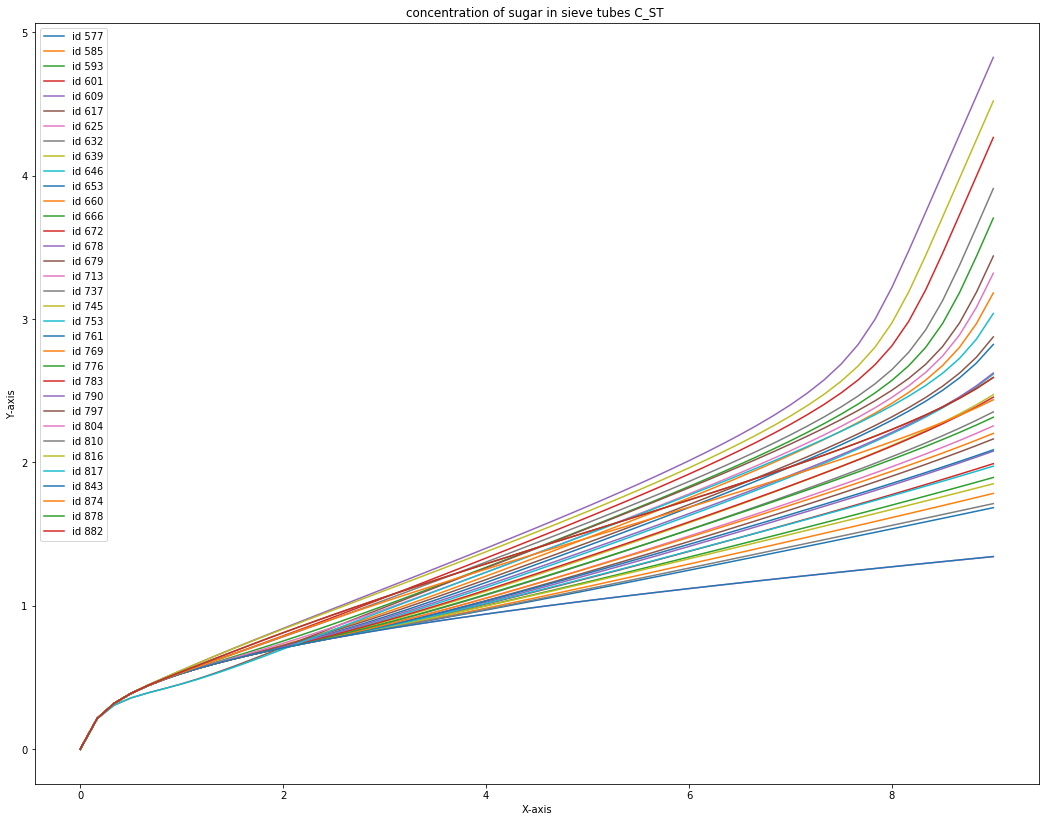

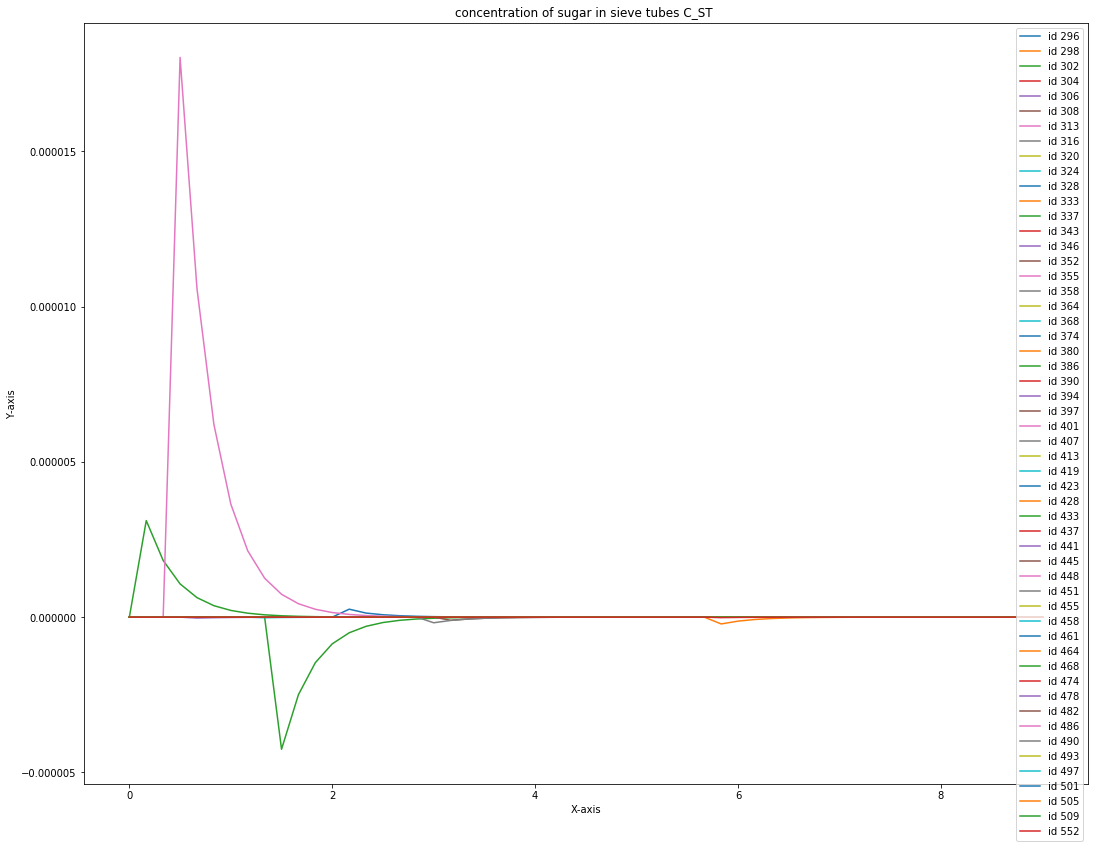

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

path = 'PiafMunch2_python_test_output.txt'

output = pd.read_table(path,sep='\t',header=1)
JS_Apo_begin = (len(node_connection)+1)*3+1
JS_Apo_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]

time = np.array(output.iloc[:, 0])
C_ST_node_565 = np.array(output.iloc[:, 565])
C_ST_node_726 = np.array(output.iloc[:, 726])
C_ST_node_871 = np.array(output.iloc[:, 871])
C_ST_leaf = np.array(output.iloc[:, N1L_node[:,0]])
C_ST_root = np.array(output.iloc[:, N1R_node[:,0]])




plt.rcParams['figure.figsize'] = [18, 14]


x = np.array(time)
y = np.array(C_ST_leaf)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar in leaf tips sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1L_node[i,0])
plt.legend()
plt.show()


x = np.array(time)
y = np.array(C_ST_root)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar root tips sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1R_node[i,0])
plt.legend()
plt.show()



x = np.array(time)
y = np.array(C_ST_root)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar in sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1R_node[i,0])
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

path = 'PiafMunch2_python_test_output.txt'

output = pd.read_table(path,sep='\t',header=1)
JS_Apo_begin = (len(node_connection)+1)*7+1
JS_Apo_end = JS_Apo_begin +(len(node_connection))
output.iloc[54, JS_Apo_begin:JS_Apo_end]

time = np.array(output.iloc[:, 0])
C_ST_node_565 = np.array(output.iloc[:, 565])
C_ST_node_726 = np.array(output.iloc[:, 726])
C_ST_node_871 = np.array(output.iloc[:, 871])
C_ST_leaf = np.array(output.iloc[:, N1L_node[:,0]])
C_ST_root = np.array(output.iloc[:, N1R_node[:,0]])




plt.rcParams['figure.figsize'] = [18, 14]


x = np.array(time)
y = np.array(C_ST_leaf)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar in leaf tips sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1L_node[i,0])
plt.legend()
plt.show()


x = np.array(time)
y = np.array(C_ST_root)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar root tips sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1R_node[i,0])
plt.legend()
plt.show()



x = np.array(time)
y = np.array(C_ST_root)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("concentration of sugar in sieve tubes C_ST ")
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%N1R_node[i,0])
plt.legend()
plt.show()

In [ ]:
C_ApoUpflow (mmol / ml)
C_ParApo (mmol / ml)
C_PhlApo (mmol / ml)
C_ST (mmol / ml)
C_Sympl (mmol / ml)
C_SymplUpflow (mmol / ml)
JS_Apo (mmol / h)
JS_ParMb (mmol / h)
JS_PhlMb (mmol / h)
JS_Sympl (mmol / h)
JW_Apo (ml / h)
JW_ParMb (ml / h)
JW_Sympl (ml / h)
JW_Trsv (ml / h)
P_PhlApo (MPa)
P_ST (MPa)
P_ST_dot (MPa / h)
P_Sympl (MPa)
P_Sympl_dot (MPa / h)
P_Xyl (MPa)
PsiSoil (MPa)
Psi_ParApo (MPa)
Psi_PhlApo (MPa)
Psi_ST (MPa)
Q_PhlApo (mmol)
Q_PhlApo_dot (mmol / h)
Q_Sympl_dot (mmol / h)
Transpirat (ml / h)
vol_Sympl (ml)
vol_Sympl_dot (ml / h)



double* Q_Sympl = NULL						; // Amount of sugar in parenchyma symplasm										(mmol)
double* Q_ST = NULL						; // Amount of sugar in sieve tubes	= C_TC * Vol_ST						(mmol)
double* Starch = NULL						; // Amount of starch in parenchyma										(mmol)
double* Q_PhlApo = NULL                 ; // amount of sugar in phloem apoplasm   (mmol)
double* Q_ParApo = NULL                 ; // amount of sugar in lateral parenchyma apoplasm   (mmol)
Fortran_vector JS_ST						; // (mmol / h)  : Axial phloem sugar flux
Fortran_vector JS_PhlMb				; // Phloem cross-membrane sugar fluxes into sieve tubes from apoplasm				(mmol / h)
Fortran_vector RespMaint					; // Maintenance respiration rate										(mmol / h)
Fortran_vector StarchSyn						; // Michaelis-Menten rate of starch synthesis from sugar substrate						(mmol sug.eq./ h)
Fortran_vector C_amont					; //  (mmol / ml) : ST Sugar concentration at upflow node
Fortran_vector Input					; // e.g. Leaf photosynthetic assimilation rate, but may occur at any node, whether 'leaf' or not (boundary condition)			(mmol / h)
Fortran_vector C_Sympl						; // Concentration of sugar in parenchyma = Q_Par / vol_Sympl			(mmol / ml)
Fortran_vector C_ST							; // Concentration of sugar in sieve tubes								(mmol / ml solution))
double* vol_Sympl = NULL							; // total volume of symplasm	(ml), which is a reservoir of variable size
Fortran_vector JS_Sympl						; // Symplasmic flux of sugar from Lateral parenchyma to phloem ST (mmol / h)
Fortran_vector JS_ParMb				; // Lateral parenchyma cross-membrane sugar flux into symplasm from apoplasm				(mmol / h)
Fortran_vector JS_Apo						; // apoplasmic sugar flux from phloem to Lateral parenchyma  (mmol / h)
extern Fortran_vector JW_ParMb, JW_Apo, JW_Sympl ; // water fluxes corresponding to above 3 sugar fluxes   (ml / h)
Fortran_vector C_SymplUpflow					; // upflow concentration (mmol / ml) for JS_Sympl
Fortran_vector C_PhlApo, C_ParApo, C_ApoUpflow ; // (mmol / ml) apoplasmic sugar conc., resp. in phloem and lat.parenchyma, and upflow conc. for JS_Apo
Fortran_vector Delta_JS_ST ; // sera la composante purement phloémienne de Q_TC_dot[ ]							(mmol / h)
extern Fortran_vector P_Sympl		; // Lateral parenchyma symplasmic turgor pressure 								(MPa)
double Starch_dot_alt ; // for an alternate, target-oriented,  expression of starch variation rate